In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#read in the directory data and drop the ones that aren't ncessch year and latitude and longitude 
directory = pd.read_csv('directory_all.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (6,7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
directory = directory[['year', 'ncessch', 'latitude', 'longitude',
                      'enrollment', 'school_name']]

In [4]:
ap = pd.read_csv('ap_dropped.csv')

In [5]:
ap_dir = ap.merge(directory, on = ['year', 'ncessch'], how = 'left')

In [6]:
print(ap_dir.shape)
print(ap.shape)
print(directory.shape)

(118664, 11)
(118664, 7)
(41716, 6)


In [7]:
#comment this out later 
ap_dir_tottot = ap_dir[(ap_dir['race'] == 99) &
                        (ap_dir['sex'] == 99)]

ap_dir_tottot.to_csv('ap_dir_tottot.csv', index = False)

In [9]:
#now that we have a usuable dataframe make a map with the known values.... 
ap_dir_2011tot = ap_dir[(ap_dir['year'] == 2011) & 
                        (ap_dir['race'] == 99) &
                        (ap_dir['sex'] == 99)]

#drop the ncessch that is null
ap_dir_2011tot = ap_dir_2011tot.dropna(axis = 0, subset=('ncessch',))
ap_dir_2011tot.isnull().sum()

ncessch                       0
year                          0
leaid                         0
race                          0
sex                           0
students_AP_exam_none         0
students_AP_exam_oneormore    0
latitude                      0
longitude                     0
enrollment                    0
school_name                   0
dtype: int64

In [10]:
del ap 
del directory 
ap_dir_2011tot.nunique()

ncessch                       1168
year                             1
leaid                          410
race                             1
sex                              1
students_AP_exam_none          229
students_AP_exam_oneormore     504
latitude                      1132
longitude                     1132
enrollment                     985
school_name                   1113
dtype: int64

In [11]:
ap_dir_2011tot

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name
18967,6.000010e+10,2011,600001.0,99,99,89.0,42.0,34.493620,-118.216110,513.0,VASQUEZ HIGH
18975,6.000031e+10,2011,600003.0,99,99,13.0,2.0,37.559633,-121.963038,420.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT
18983,6.000111e+10,2011,600011.0,99,99,2.0,4.0,40.138741,-120.143969,78.0,HERLONG HIGH
18991,6.000130e+10,2011,600013.0,99,99,11.0,483.0,38.813629,-121.253474,1843.0,ROCKLIN HIGH
18999,6.000131e+10,2011,600013.0,99,99,0.0,424.0,38.836409,-121.289393,1777.0,WHITNEY HIGH
...,...,...,...,...,...,...,...,...,...,...,...
28351,6.421400e+10,2011,642140.0,99,99,0.0,10.0,38.897611,-121.329371,1428.0,HORIZON CHARTER
28367,6.415801e+10,2011,641580.0,99,99,2.0,0.0,38.570695,-121.533235,171.0,WEST SACRAMENTO EARLY COLLEGE PREP CHARTER
28375,6.425101e+10,2011,642510.0,99,99,0.0,0.0,34.206115,-118.203882,2191.0,OPPORTUNITIES FOR LEARNING - SANTA CLARITA
28383,6.170401e+10,2011,617040.0,99,99,0.0,0.0,34.206174,-118.204103,803.0,OPPORTUNITIES FOR LEARNING - HERMOSA BEACH


## Now we have th edirectory data merged with the ap data 
## Map for 2011 totals (no seperation for sex or race) 
-make the map for the other year totals as well

-try to do some eda for other datasets or predictors as well

-covariate matrix will have to wait till access to more memory 

In [1]:
#first convert to a geodataframe 
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [13]:
#ap_dir_2011tot = geopandas.GeoDataFrame(ap_dir_2011tot,
 #                                      geometry = geopandas.points_from_xy(
  #                                         ap_dir_2011tot.longitude, ap_dir_2011tot.latitude))

In [2]:
#adding a crs column into a geodataframe 
#ap_dir_2011tot.head()
# ap_dir_2011tot.to_file('ap_dir_2011tot.geojson', driver='GeoJSON')

#reading in the geojson file 
ap_dir_2011tot = gpd.read_file('ap_dir_2011tot.geojson')

In [3]:
ap_dir_2011tot.head()

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,geometry
0,6.000010e+10,2011,600001.0,99,99,89.0,42.0,34.493620,-118.216110,513.0,VASQUEZ HIGH,8.187135,POINT (-118.21611 34.49362)
1,6.000031e+10,2011,600003.0,99,99,13.0,2.0,37.559633,-121.963038,420.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.476190,POINT (-121.96304 37.55963)
2,6.000111e+10,2011,600011.0,99,99,2.0,4.0,40.138741,-120.143969,78.0,HERLONG HIGH,5.128205,POINT (-120.14397 40.13874)
3,6.000130e+10,2011,600013.0,99,99,11.0,483.0,38.813629,-121.253474,1843.0,ROCKLIN HIGH,26.207271,POINT (-121.25347 38.81363)
4,6.000131e+10,2011,600013.0,99,99,0.0,424.0,38.836409,-121.289393,1777.0,WHITNEY HIGH,23.860439,POINT (-121.28939 38.83641)


In [4]:
import contextily as cx

In [5]:
ap_dir_2011tot.crs = "EPSG:4326"

In [14]:
#creating a new columns that is the percent of exams taken 
#ap_dir_2011tot['AP_oneormore_relative']= (ap_dir_2011tot['students_AP_exam_oneormore']
 #                                       / ap_dir_2011tot['enrollment']) * 100
ap_dir_2011tot.head()

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,geometry,AP_oneormore_relative
0,6.000010e+10,2011,600001.0,99,99,89.0,42.0,34.493620,-118.216110,513.0,VASQUEZ HIGH,POINT (-118.21611 34.49362),8.187135
1,6.000031e+10,2011,600003.0,99,99,13.0,2.0,37.559633,-121.963038,420.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,POINT (-121.96304 37.55963),0.476190
2,6.000111e+10,2011,600011.0,99,99,2.0,4.0,40.138741,-120.143969,78.0,HERLONG HIGH,POINT (-120.14397 40.13874),5.128205
3,6.000130e+10,2011,600013.0,99,99,11.0,483.0,38.813629,-121.253474,1843.0,ROCKLIN HIGH,POINT (-121.25347 38.81363),26.207271
4,6.000131e+10,2011,600013.0,99,99,0.0,424.0,38.836409,-121.289393,1777.0,WHITNEY HIGH,POINT (-121.28939 38.83641),23.860439


In [6]:
#there are some enrollment values that are less than zero 
#just going to drop them because that indicates that its zero or NA 
ap_dir_2011tot = ap_dir_2011tot[ap_dir_2011tot.enrollment > 0]

In [7]:
ap_dir_2011tot

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,geometry
0,6.000010e+10,2011,600001.0,99,99,89.0,42.0,34.493620,-118.216110,513.0,VASQUEZ HIGH,8.187135,POINT (-118.21611 34.49362)
1,6.000031e+10,2011,600003.0,99,99,13.0,2.0,37.559633,-121.963038,420.0,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.476190,POINT (-121.96304 37.55963)
2,6.000111e+10,2011,600011.0,99,99,2.0,4.0,40.138741,-120.143969,78.0,HERLONG HIGH,5.128205,POINT (-120.14397 40.13874)
3,6.000130e+10,2011,600013.0,99,99,11.0,483.0,38.813629,-121.253474,1843.0,ROCKLIN HIGH,26.207271,POINT (-121.25347 38.81363)
4,6.000131e+10,2011,600013.0,99,99,0.0,424.0,38.836409,-121.289393,1777.0,WHITNEY HIGH,23.860439,POINT (-121.28939 38.83641)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,6.421400e+10,2011,642140.0,99,99,0.0,10.0,38.897611,-121.329371,1428.0,HORIZON CHARTER,0.700280,POINT (-121.32937 38.89761)
1164,6.415801e+10,2011,641580.0,99,99,2.0,0.0,38.570695,-121.533235,171.0,WEST SACRAMENTO EARLY COLLEGE PREP CHARTER,0.000000,POINT (-121.53324 38.57070)
1165,6.425101e+10,2011,642510.0,99,99,0.0,0.0,34.206115,-118.203882,2191.0,OPPORTUNITIES FOR LEARNING - SANTA CLARITA,0.000000,POINT (-118.20388 34.20611)
1166,6.170401e+10,2011,617040.0,99,99,0.0,0.0,34.206174,-118.204103,803.0,OPPORTUNITIES FOR LEARNING - HERMOSA BEACH,0.000000,POINT (-118.20410 34.20617)


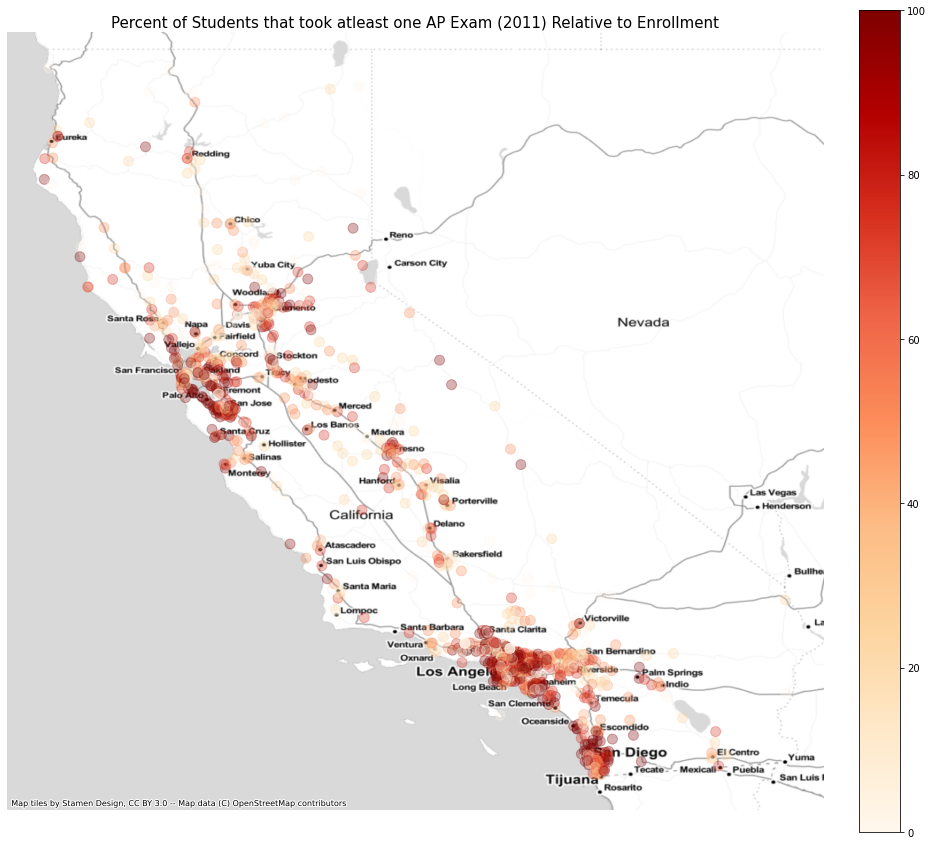

In [8]:
#min and max of the students who took exams 
vmin, vmax = 0, 100
f,ax = plt.subplots(1,1,figsize=(16,16))

ap_dir_2011tot.plot(column='AP_oneormore_relative', ax=ax,
        scheme="quantiles",  k=5, cmap='OrRd', markersize = 100, alpha = .3)

ax.set_title("Percent of Students that took atleast one AP Exam (2011) Relative to Enrollment", fontsize=15)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array = ([])
f.colorbar(sm, fraction=0.046, pad=0.04)

cx.add_basemap(ax, crs=ap_dir_2011tot.crs.to_string(), source=cx.providers.Stamen.TonerLite)

plt.show()



based off of this map it appears that the more populated areas are the ones that have the most AP Exams that are taken by students as opposed to the areas that are not as populated. Perhaps we should create a map with the percent of AP exams taken relative to the total school population. 

This is just the data from 2011 for both race and gender. We can also create a map that is for the different years and also for the different races and sexes that those schools have as well. 

Try to make the map zoom innie I suppose let us seeeeee.... 

In [29]:
import folium 

#figure out bigger dots for bigger enrollment 

total_2011 = ap_dir_2011tot.explore(column = 'AP_oneormore_relative',
                                   legend = True, scheme = 'naturalbreaks',
                                   cmap = 'OrRd', marker_kwds = {'radius': 5}
                                   )
total_2011